# Exploratory Data Analysis 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset_diabetes/diabetic_data_clean.csv')
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_range
0,1,149190,55629189,0,0,[10-20),1,1,7,3,...,2,0,0,0,0,0,0,1,2,1
1,2,64410,86047875,1,0,[20-30),1,1,7,2,...,0,0,0,0,0,0,1,1,0,2
2,3,500364,82442376,0,1,[30-40),1,1,7,2,...,2,0,0,0,0,0,0,1,0,4
3,4,16680,42519267,0,1,[40-50),1,1,7,1,...,1,0,0,0,0,0,0,1,0,5
4,5,35754,82637451,0,1,[50-60),2,1,2,3,...,1,0,0,0,0,0,1,1,2,6


In [3]:
df.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_range'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_range
0,149190,55629189,0,0,[10-20),1,1,7,3,59,...,2,0,0,0,0,0,0,1,2,1
1,64410,86047875,1,0,[20-30),1,1,7,2,11,...,0,0,0,0,0,0,1,1,0,2
2,500364,82442376,0,1,[30-40),1,1,7,2,44,...,2,0,0,0,0,0,0,1,0,4
3,16680,42519267,0,1,[40-50),1,1,7,1,51,...,1,0,0,0,0,0,0,1,0,5
4,35754,82637451,0,1,[50-60),2,1,2,3,31,...,1,0,0,0,0,0,1,1,2,6


__Statistical Summary__

In [6]:
df.describe()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_range
count,9.805200e+04,9.805200e+04,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,...,98052.000000,98052.000000,98052.000000,98052.000000,98052.0,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000
mean,1.658301e+08,5.484745e+07,0.326510,0.461174,2.025803,3.753396,5.776741,4.422011,43.148462,1.350712,...,0.884174,0.006945,0.000133,0.000010,0.0,0.000010,0.538225,0.768470,0.819606,7.051391
std,1.024325e+08,3.866167e+07,0.731817,0.498493,1.450121,5.309412,4.071632,2.993070,19.711757,1.708475,...,1.024416,0.084871,0.011514,0.003194,0.0,0.003194,0.498539,0.421813,0.924450,1.774770
min,1.252200e+04,1.350000e+02,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.528559e+07,2.350234e+07,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,6.000000
50%,1.533025e+08,4.687610e+07,0.000000,0.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,7.000000
75%,2.305018e+08,8.800306e+07,0.000000,1.000000,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,2.000000,9.000000
max,4.438672e+08,1.895026e+08,4.000000,1.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,...,3.000000,3.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.000000,9.000000


__Target Variable- Readmission__

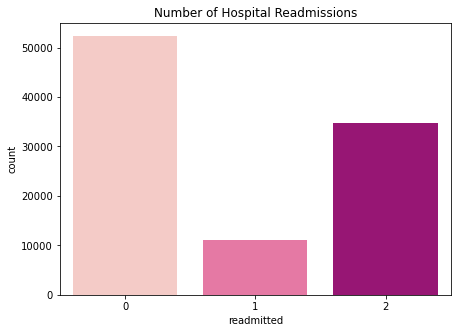

In [7]:
plt.figure(figsize=(7,5))
sns.countplot(x='readmitted',data=df, palette= 'RdPu')
plt.title('Number of Hospital Readmissions');

* The target variable 'readmitted' in the initial dataset contained three categories:


    - 0: “No” for no record of readmission. 
    - 1: “<30” if the patient was readmitted in less than 30 days.
    - 2: “>30” if the patient was readmitted in more than 30 days.
    
 For our modeling purposes we need to get binary values of 0 and 1, so I've classified the vlaues in this variables as such:
    - 0: “No” for no record of readmission. 
    - 1: “<30” or  “>30”, record of readmisiion, regardless of how many days after being discharged. 

In [8]:
df.readmitted.value_counts()

0    52337
2    34649
1    11066
Name: readmitted, dtype: int64

In [9]:
df['readmitted'] = pd.Series([0 if val == 0 else 1 for val in df['readmitted']])

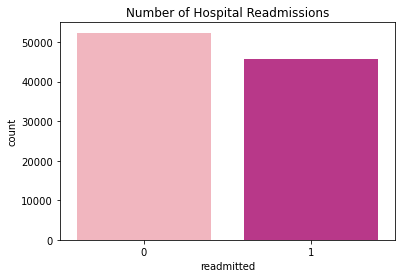

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='readmitted',data=df, palette= 'RdPu')
plt.title('Number of Hospital Readmissions');

__Let's Explore the other variables and decided how best to utilize them given our results.__

In [11]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_range'],
      dtype='object')

The first two variables in the data set are numeric but are unique identifiers as such won't be used for any ED of statistical analysis. 
* 'encounter_id'
* 'patient_nbr'

* since these do not affect my modleing in anyway, I'll just drop these columns to keep things as clean as possible. 

In [12]:
df.drop_duplicates(subset=['encounter_id'])

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_range
0,149190,55629189,0,0,[10-20),1,1,7,3,59,...,2,0,0,0,0,0,0,1,1,1
1,64410,86047875,1,0,[20-30),1,1,7,2,11,...,0,0,0,0,0,0,1,1,0,2
2,500364,82442376,0,1,[30-40),1,1,7,2,44,...,2,0,0,0,0,0,0,1,0,4
3,16680,42519267,0,1,[40-50),1,1,7,1,51,...,1,0,0,0,0,0,0,1,0,5
4,35754,82637451,0,1,[50-60),2,1,2,3,31,...,1,0,0,0,0,0,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98047,443847548,100162476,1,1,[70-80),1,3,7,3,51,...,3,0,0,0,0,0,0,1,1,9
98048,443847782,74694222,1,0,[80-90),1,4,5,5,33,...,1,0,0,0,0,0,1,1,0,7
98049,443854148,41088789,0,1,[70-80),1,1,7,1,53,...,3,0,0,0,0,0,0,1,0,9
98050,443857166,31693671,0,0,[80-90),2,3,7,10,45,...,2,0,0,0,0,0,0,1,0,7


In [13]:
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

__Race__

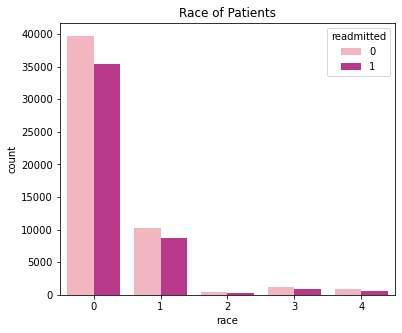

In [14]:
plt.figure(figsize=(6,5))
sns.countplot(x = df['race'], hue=df['readmitted'],palette= 'RdPu')
plt.title("Race of Patients");


'Caucasian',
'AfricanAmerican','
Asian',
'Hispanic',
'Other']);

__Gender__

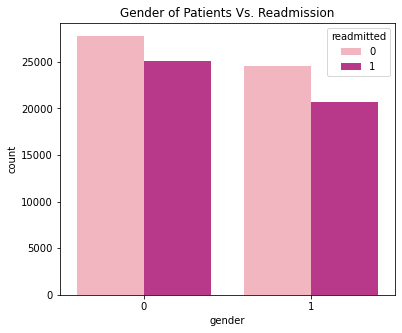

In [15]:
plt.figure(figsize=(6,5))
sns.countplot(x = df['gender'], hue=df['readmitted'],palette= 'RdPu')
plt.title("Gender of Patients Vs. Readmission");

__Readmission Rate Based on Age___

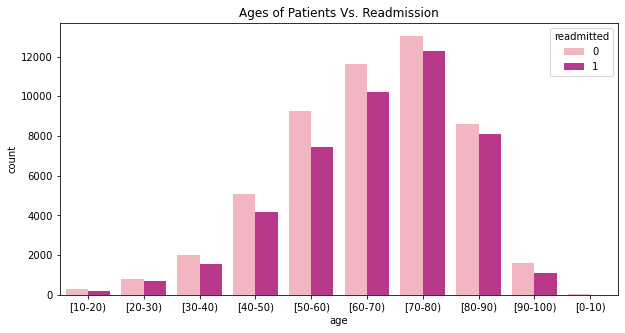

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['age'], hue=df['readmitted'],palette= 'RdPu')
plt.title("Ages of Patients Vs. Readmission");

* In all age groups the number of readmissions never exceeding the number of non-readmissions.
* The age group with the highest readmissions overall were those between 70-80 years of age. 

__Admission Type__

https://www.hcup-us.ahrq.gov/db/vars/atype/nisnote.jsp#values

In [17]:
df['admission_type_id'] = pd.Series(['Emergency' if val == 1 else'Urgent' if val == 2
                                    else 'Elective' if val == 3
                                     else 'Newborn' if val == 4
                                     else 'Delivery Center' if val ==5
                                     else 'Trauma Center' if val == 6 else 'Other' 
                                              for val in df['admission_type_id']], index=df.index)

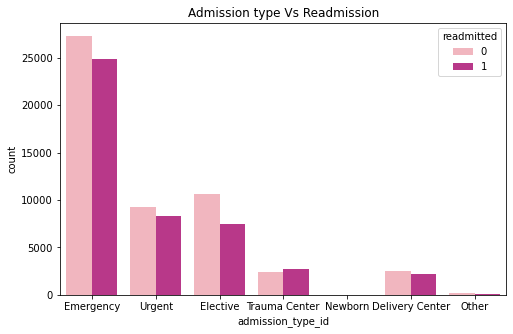

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x = df['admission_type_id'], hue=df['readmitted'],palette= 'RdPu')
plt.title("Admission type Vs Readmission");

Converting back to an integer for modeling purposes moving forward. 

In [19]:
#Converting back to an integer for modeling purposes moving forward.
df['admission_type_id']= df.admission_type_id.map({'Emergency':0, 'Elective':1, 'Urgent':2,'Trauma Center':3, 'Delivery Center':4,'Newborn':5,'Other':6})

__Admission source__

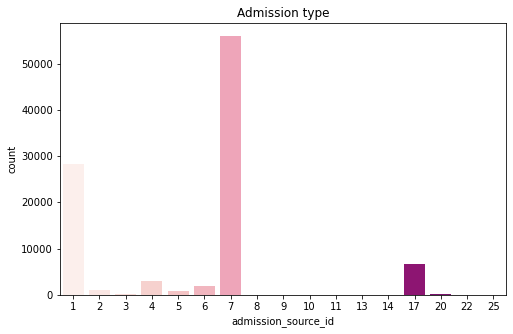

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='admission_source_id',data=df, palette= 'RdPu')
plt.title("Admission type");

In [21]:
df.admission_source_id.value_counts()

7     55951
1     28355
17     6602
4      2945
6      1893
2      1031
5       846
3       179
20      160
9        49
8        15
22       12
10        7
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

__Reduction of the admission source categories__

In [22]:
df['admission_source_id'] = pd.Series(['Emergency room' if val == 7 else 'Physician/Clinic referral' if val == 1 else 'Other source' 
                                              for val in df['admission_source_id']], index=df.index)

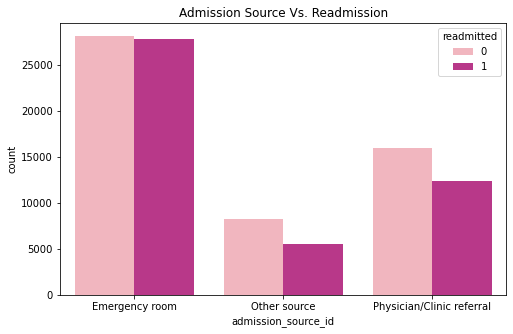

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x = df['admission_source_id'], hue=df['readmitted'],palette= 'RdPu')
plt.title("Admission Source Vs. Readmission");

In [24]:
#Converting back to an integer for modeling purposes moving forward.
df['admission_source_id']= df.admission_source_id.map({'Emergency room':0, 'Physician/Clinic referral':1,'Other source':2})

__Discharge Disposition__

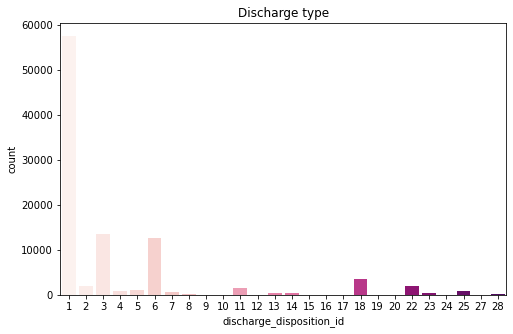

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x ='discharge_disposition_id',data=df, palette= 'RdPu')
plt.title("Discharge type");

In [26]:
df.discharge_disposition_id.value_counts()

1     57609
3     13564
6     12626
18     3624
2      2049
22     1970
11     1606
5      1127
25      941
4       756
7       592
23      400
13      396
14      368
28      137
8       106
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [27]:
df['discharge_disposition_id'] = pd.Series(['Discharged Home' if val == 1 else 'Other discharge' 
                                              for val in df['discharge_disposition_id']], index=df.index)

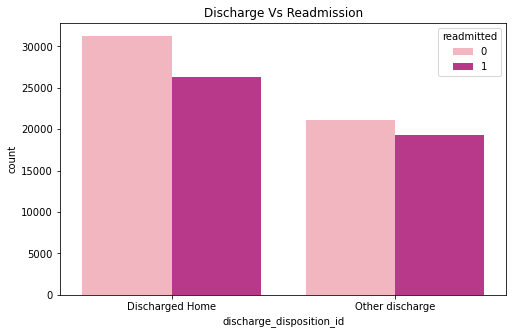

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x = df['discharge_disposition_id'], hue=df['readmitted'],palette= 'RdPu')
plt.title("Discharge Vs Readmission");

In [29]:
#Converting back to an integer for modeling purposes moving forward.
df['discharge_disposition_id']= df.discharge_disposition_id.map({'Discharged Home':0, 'Other discharge':1})

__Diagnoses Attributes__

* 'diag_1'- primary diagnoses
* 'diag_2'- secondary diagnosis
* 'diag_3'- additional diagnosis

Each of these inidicated a particular level of diagnosis for a give patient. Hoeever each had 848-923 distinct  values coded as the first three digit of teh Internatin classification of Dieseas (ICD- 9). Based on reserach papers used for my analyze I decided to do what previous reserahcer and analyst had done and conslidate these into 9 majo categories: include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others.

In [30]:
#dictionary of codes and the related disease. 
# Circulatory 390–459, 785 
# Respiratory 460–519, 786 
# Digestive 520–579, 787 
# Diabetes 250.xx 
# Injury 800–999 4
# Musculoskeletal 710–739 
# Genitourinary 580–629, 788 
# Neoplasms 140–239 ,780, 781, 784, 790–799 ,  240–279, without 250, 680–709, 782 
# Other 

In [31]:
df.diag_1.value_counts()

428.0       6730
414.0       6373
786.0       3900
410.0       3514
486.0       3412
            ... 
838.0          1
906.0          1
955.0          1
698.0          1
500060.0       1
Name: diag_1, Length: 713, dtype: int64

In [32]:
df['diag_1'] = pd.Series(['Circulatory' if (val >=390 and val < 460) or (val == 785)
                          else 'Respiratory' if(val  >= 460 and val < 520) or (val == 786)
                          else 'Digestive' if (val >= 520 and val < 580) or (val == 787)
                          else 'Diabetes' if (val == 250)
                          else 'Injury' if (val >= 800 and val < 1000)
                          else 'Musculoskeletal' if (val >= 710 and val < 740)
                          else 'Genitourinary' if(val >=580  and val < 670) or (val == 788)
                          else 'Neoplasms' if(val  >= 140 and val < 240) or (val >=240 and val < 250) or (val >250 and val < 280) or (val == 780) or (val == 781) or (val == 782) or (val == 784) or (val >= 790 and val < 800) or (val >= 600 and val < 710)
                          else 'Other'for val in df['diag_1']], index=df.index)

In [33]:
df.diag_1.value_counts()

Circulatory        29629
Neoplasms          18678
Respiratory        13993
Other               9308
Digestive           9187
Injury              6703
Genitourinary       5624
Musculoskeletal     4739
Diabetes             191
Name: diag_1, dtype: int64

In [34]:
df.diag_1.unique()

array(['Neoplasms', 'Genitourinary', 'Other', 'Circulatory',
       'Respiratory', 'Injury', 'Musculoskeletal', 'Digestive',
       'Diabetes'], dtype=object)

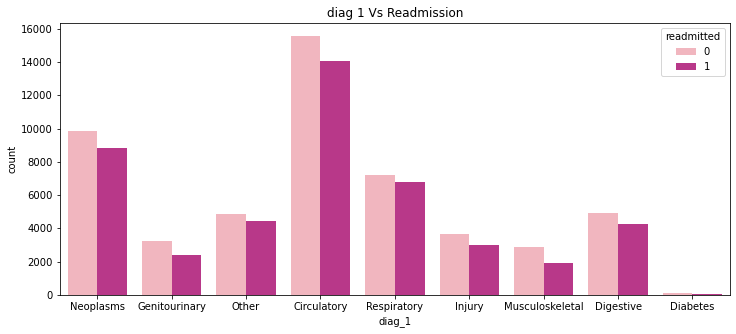

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['diag_1'], hue=df['readmitted'],palette= 'RdPu')
plt.title("diag 1 Vs Readmission");

In [36]:
df['diag_1']= df.diag_1.map({'Circulatory':0, 'Respiratory':1,'Digestive':2, 'Diabetes':3, 'Injury':4,'Musculoskeletal':5,'Genitourinary':6, 'Neoplasms':7, 'Other':8})

In [37]:
df['diag_2'] = pd.Series(['Circulatory' if (val >=390 and val < 460) or (val == 785)
                          else 'Respiratory' if(val  >= 460 and val < 520) or (val == 786)
                          else 'Digestive' if (val >= 520 and val < 580) or (val == 787)
                          else 'Diabetes' if (val == 250)
                          else 'Injury' if (val >= 800 and val < 1000)
                          else 'Musculoskeletal' if (val >= 710 and val < 740)
                          else 'Genitourinary' if(val >=580  and val < 670) or (val == 788)
                          else 'Neoplasms' if(val  >= 140 and val < 240) or (val >=240 and val < 250) or (val >250 and val < 280) or (val == 780) or (val == 781) or (val == 782) or (val == 784) or (val >= 790 and val < 800) or (val >= 600 and val < 710)
                          else 'Other'for val in df['diag_2']], index=df.index)

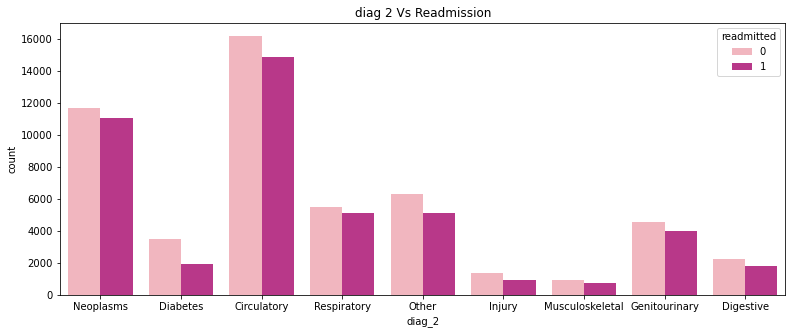

In [38]:
plt.figure(figsize=(13,5))
sns.countplot(x = df['diag_2'], hue=df['readmitted'],palette= 'RdPu')
plt.title("diag 2 Vs Readmission");

In [39]:
df['diag_2']= df.diag_2.map({'Circulatory':0, 'Respiratory':1,'Digestive':2, 'Diabetes':3, 'Injury':4,'Musculoskeletal':5,'Genitourinary':6, 'Neoplasms':7, 'Other':8})

__Consolidation of diag- 3 categories.__

In [40]:
df['diag_3'] = pd.Series(['Circulatory' if (val >=390 and val < 460) or (val == 785)
                          else 'Respiratory' if(val  >= 460 and val < 520) or (val == 786)
                          else 'Digestive' if (val >= 520 and val < 580) or (val == 787)
                          else 'Diabetes' if (val == 250)
                          else 'Injury' if (val >= 800 and val < 1000)
                          else 'Musculoskeletal' if (val >= 710 and val < 740)
                          else 'Genitourinary' if(val >=580  and val < 670) or (val == 788)
                          else 'Neoplasms' if(val  >= 140 and val < 240) or (val >=240 and val < 250) or (val >250 and val < 280) or (val == 780) or (val == 781) or (val == 782) or (val == 784) or (val >= 790 and val < 800) or (val >= 600 and val < 710)
                          else 'Other'for val in df['diag_3']], index=df.index)

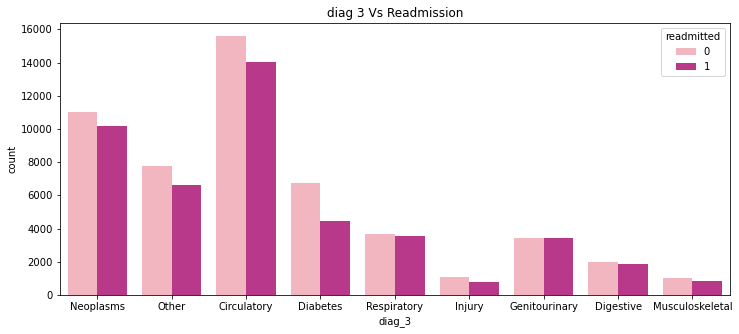

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['diag_3'], hue=df['readmitted'],palette= 'RdPu')
plt.title("diag 3 Vs Readmission");

In [42]:
df['diag_3']= df.diag_3.map({'Circulatory':0, 'Respiratory':1,'Digestive':2, 'Diabetes':3, 'Injury':4,'Musculoskeletal':5,'Genitourinary':6, 'Neoplasms':7, 'Other':8})

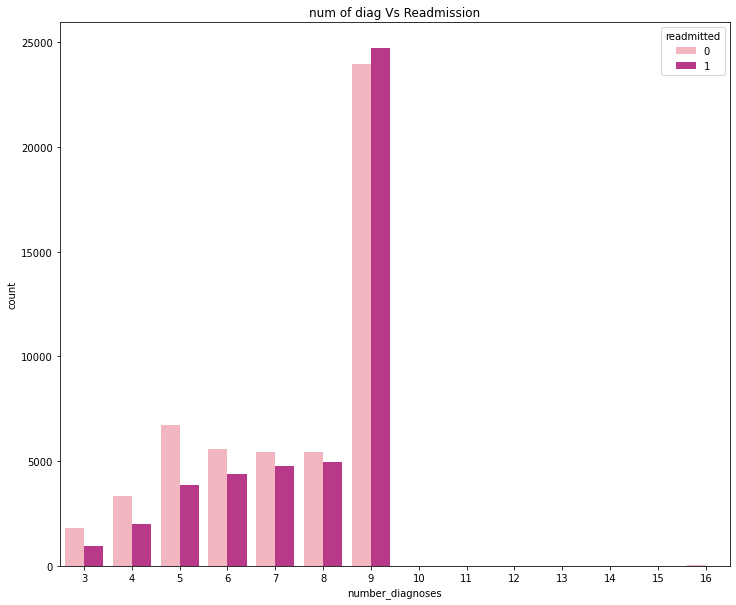

In [43]:
plt.figure(figsize=(12,10))
sns.countplot(x = df['number_diagnoses'], hue=df['readmitted'],palette= 'RdPu')
plt.title("num of diag Vs Readmission");

In [44]:
df.number_diagnoses.value_counts()

9     48687
5     10592
8     10388
7     10179
6      9988
4      5360
3      2751
16       40
10       16
13       16
11       11
12        9
15        8
14        7
Name: number_diagnoses, dtype: int64

__Glucose serum test Result__

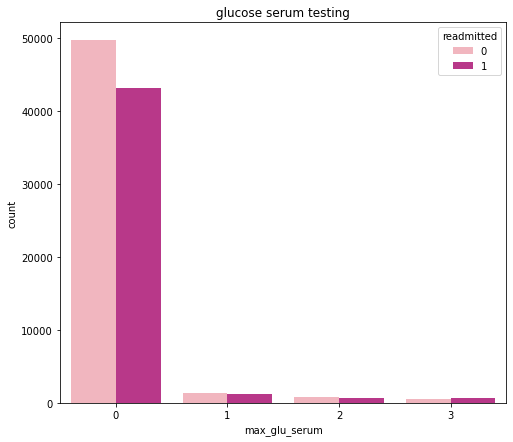

In [45]:
plt.figure(figsize=(8,7))
sns.countplot(x = df['max_glu_serum'], hue=df['readmitted'],palette= 'RdPu')
plt.title("glucose serum testing");

__A1c test result__

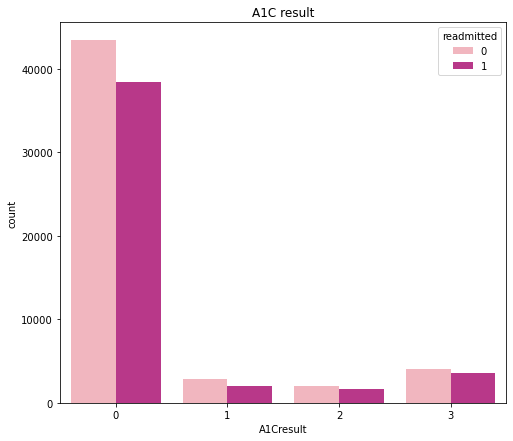

In [46]:
plt.figure(figsize=(8,7))
sns.countplot(x = df['A1Cresult'], hue=df['readmitted'],palette= 'RdPu')
plt.title("A1C result");

In [47]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_range'],
      dtype='object')

point plot: https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

__Administered Medication__

In [48]:
generic_medication = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'] 

feature indicates whether the drug was prescribed or there was a change in the dosage. 
* "No"- if the drug was not prescribed
* “steady” if the dosage did not change
* “up” if the dosage was increased during the encounter
* “down” if the dosage was decreased

<ipython-input-49-e56f6cfb9255>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,6))


<Figure size 720x432 with 0 Axes>

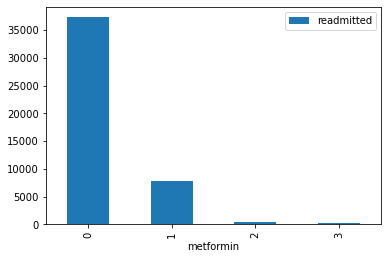

<Figure size 720x432 with 0 Axes>

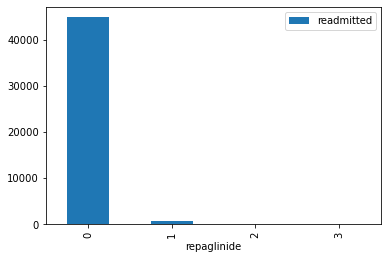

<Figure size 720x432 with 0 Axes>

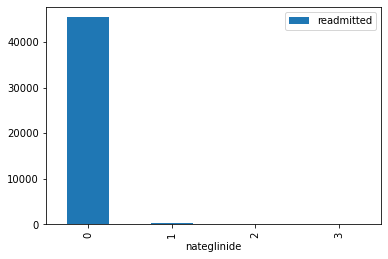

<Figure size 720x432 with 0 Axes>

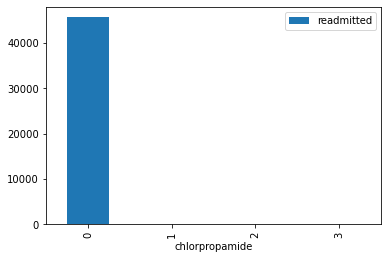

<Figure size 720x432 with 0 Axes>

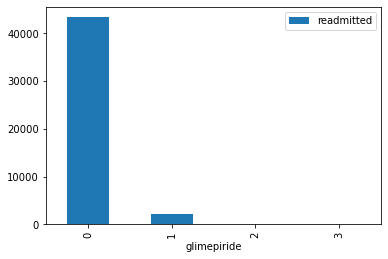

<Figure size 720x432 with 0 Axes>

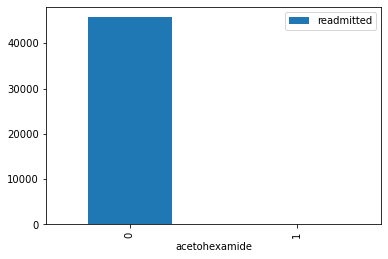

<Figure size 720x432 with 0 Axes>

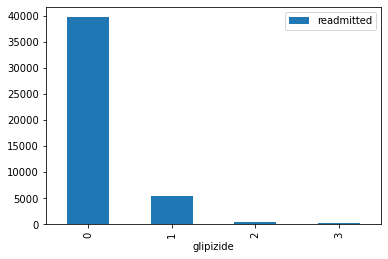

<Figure size 720x432 with 0 Axes>

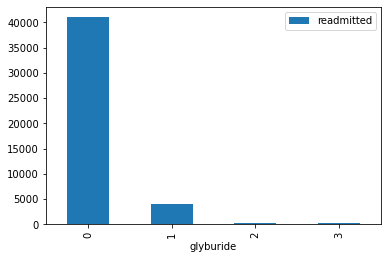

<Figure size 720x432 with 0 Axes>

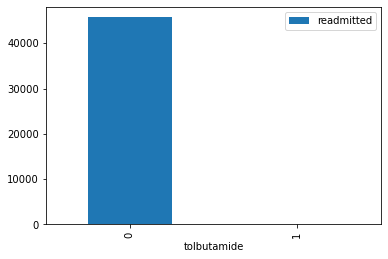

<Figure size 720x432 with 0 Axes>

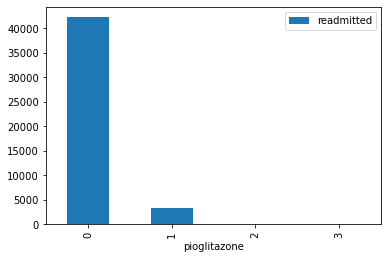

<Figure size 720x432 with 0 Axes>

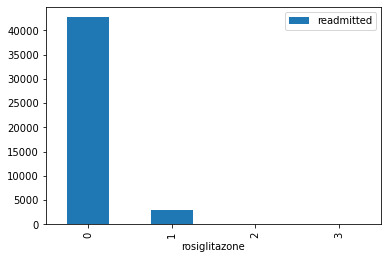

<Figure size 720x432 with 0 Axes>

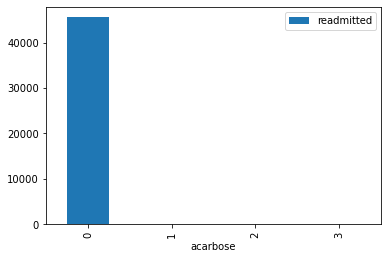

<Figure size 720x432 with 0 Axes>

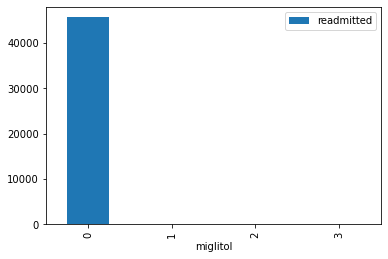

<Figure size 720x432 with 0 Axes>

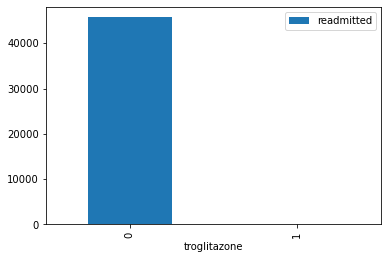

<Figure size 720x432 with 0 Axes>

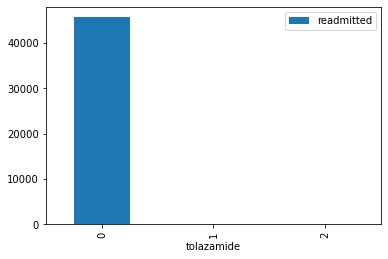

<Figure size 720x432 with 0 Axes>

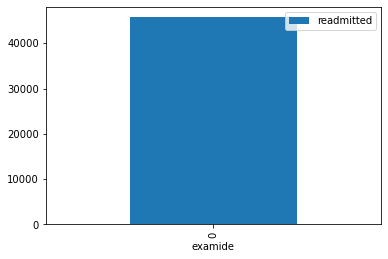

<Figure size 720x432 with 0 Axes>

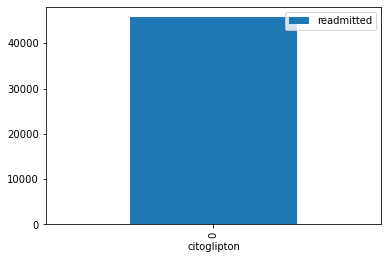

<Figure size 720x432 with 0 Axes>

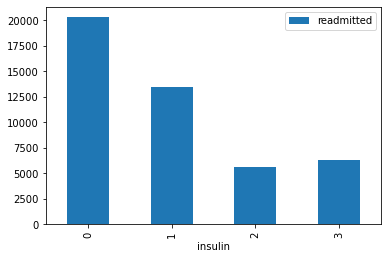

<Figure size 720x432 with 0 Axes>

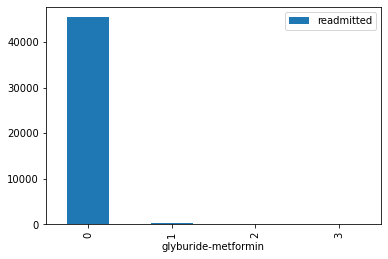

<Figure size 720x432 with 0 Axes>

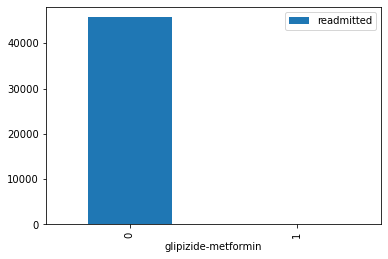

<Figure size 720x432 with 0 Axes>

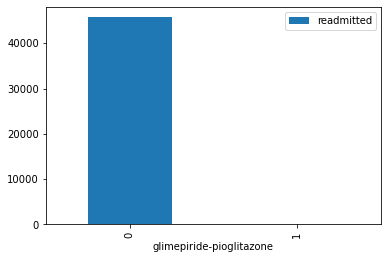

<Figure size 720x432 with 0 Axes>

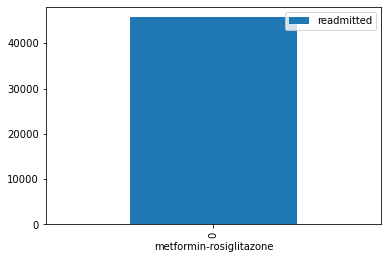

<Figure size 720x432 with 0 Axes>

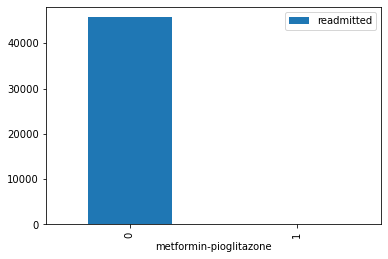

In [49]:
for col in generic_medication:
    plt.figure(figsize=(10,6))
    df.groupby(col)[['readmitted']].sum().plot(kind= 'bar')

A look at the graphs above,  I determined the the types of medication that was not admistered at all value of of "0" and dropped theses, since these had no impact on over outcomes.
 
* chlorpropamide
* acetohexamide
* troglitazone
* acarbose
* tolbutamide
* miglitol
* troglitazone
* tolazamide
* examide
* citoglipton
* glipizide-metformin
* glimepiride-pioglitazone
* metformin-rosiglitazone
* metformin-pioglitazone'

In [50]:
df.drop(['chlorpropamide','acetohexamide','troglitazone','acarbose','tolbutamide','miglitol','troglitazone','tolazamide','examide','citoglipton',
         'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'], axis=1, inplace=True)

__Change of Medication__

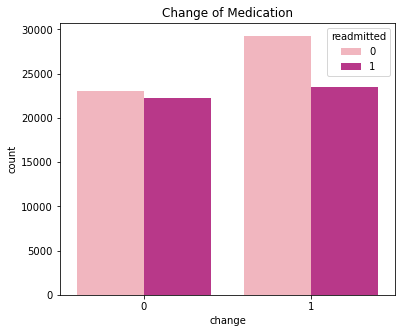

In [53]:
plt.figure(figsize=(6,5))
sns.countplot(x = df['change'], hue=df['readmitted'],palette= 'RdPu')
plt.title("Change of Medication");

__Diabetes Medication Prescribed__

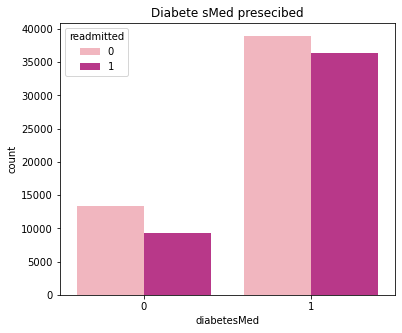

In [54]:
plt.figure(figsize=(6,5))
sns.countplot(x = df['diabetesMed'], hue=df['readmitted'],palette= 'RdPu')
plt.title("Diabete sMed presecibed");

__NON CATEGORICAL FEATURES__

__Time in Hospital__

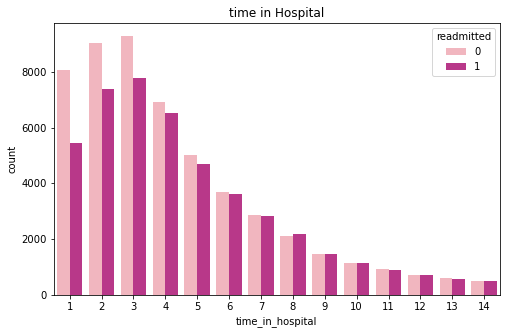

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x = df['time_in_hospital'], hue=df['readmitted'],palette= 'RdPu')
plt.title("time in Hospital");

In [58]:
explore_1_columns = ['time_in_hospital','num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient','number_emergency','number_inpatient']

<Figure size 432x288 with 0 Axes>

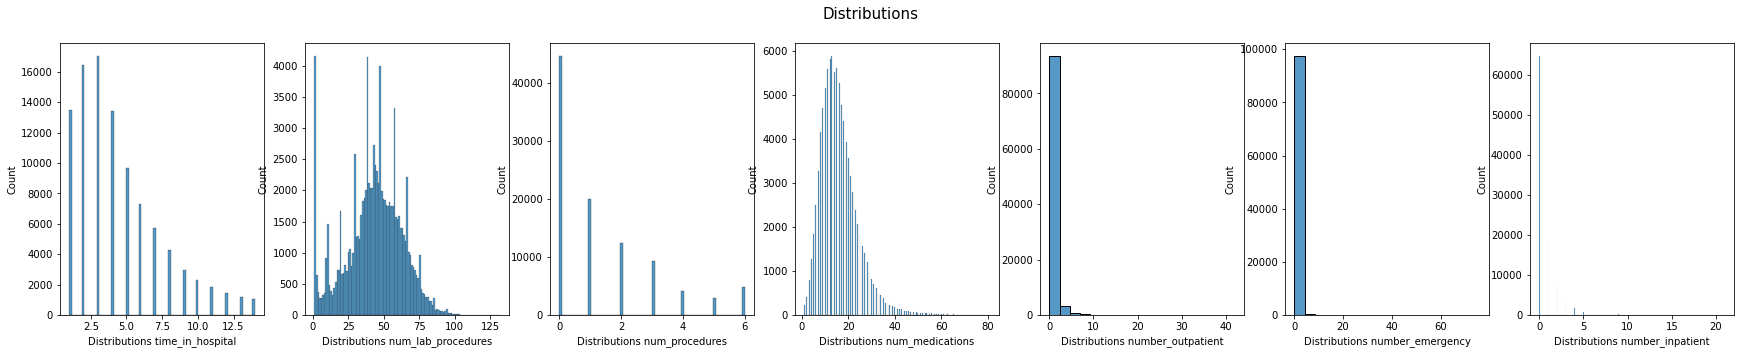

In [60]:
plt.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(30,5))

for ix, col in enumerate(explore_1_columns):
    sns.histplot(df[col], kde=False, label=col, ax=axes[ix])
    axes[ix].set_xlabel(f'Distributions {col}')

plt.suptitle('Distributions', fontsize=15)
plt.show();

<AxesSubplot:xlabel='num_lab_procedures'>

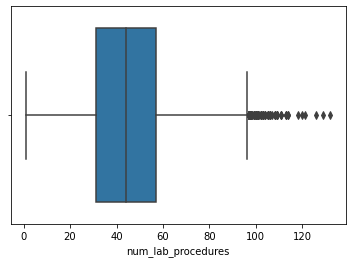

In [68]:
sns.boxplot(x=df['num_lab_procedures'])

<AxesSubplot:xlabel='time_in_hospital'>

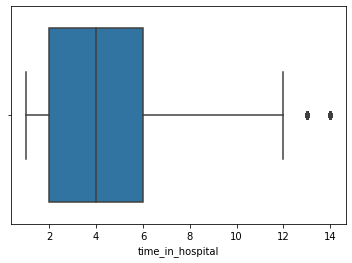

In [69]:
sns.boxplot(x=df['time_in_hospital'])

<AxesSubplot:xlabel='num_procedures'>

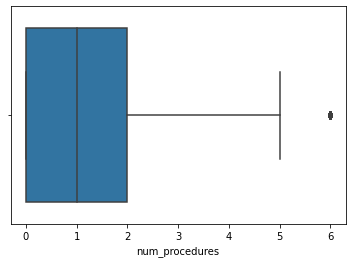

In [70]:
sns.boxplot(x=df['num_procedures'])

<AxesSubplot:xlabel='num_medications'>

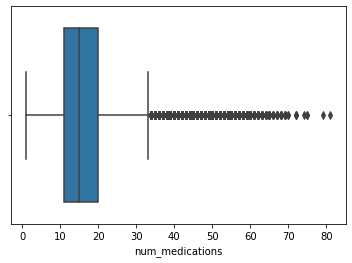

In [71]:
sns.boxplot(x=df['num_medications'])

<AxesSubplot:xlabel='number_outpatient'>

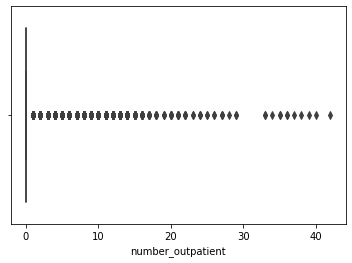

In [75]:
sns.boxplot(x=df['number_outpatient'])

<AxesSubplot:xlabel='number_inpatient'>

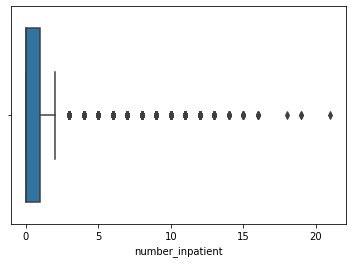

In [76]:
sns.boxplot(x=df['number_inpatient'])

<AxesSubplot:xlabel='number_emergency'>

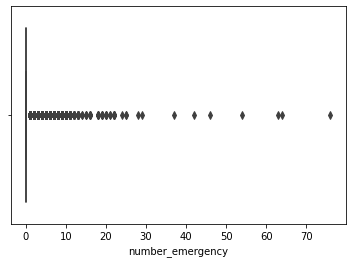

In [77]:
sns.boxplot(x=df['number_emergency'])

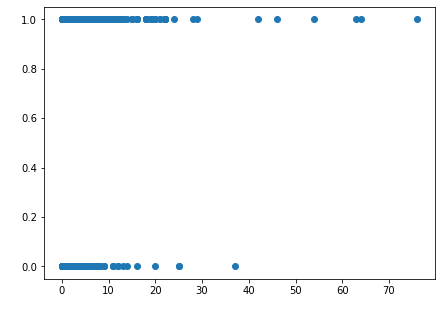

In [80]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(df['number_emergency'],df['readmitted'])
ax.set_xlabel(' ')
ax.set_ylabel(' ')
plt.show()

In [ ]:
from scipy.stats import iqr

In [81]:
Q1 = df.num_lab_procedures.quantile(0.25)
Q3 = df.num_lab_procedures.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

26.0


In [82]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(-8.0, 96.0)

In [88]:
outliers = df[~(df.num_lab_procedures<lower_limit)|~(df.num_lab_procedures>upper_limit)]
outliers

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glyburide-metformin,change,diabetesMed,readmitted,age_range
0,0,0,[10-20),0,0,0,3,59,0,18,...,0,0,0,0,2,0,0,1,1,1
1,1,0,[20-30),0,0,0,2,11,5,13,...,1,0,0,0,0,0,1,1,0,2
2,0,1,[30-40),0,0,0,2,44,1,16,...,0,0,0,0,2,0,0,1,0,4
3,0,1,[40-50),0,0,0,1,51,0,8,...,1,0,0,0,1,0,0,1,0,5
4,0,1,[50-60),2,0,2,3,31,6,16,...,0,0,0,0,1,0,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98047,1,1,[70-80),0,1,0,3,51,0,16,...,0,0,0,0,3,0,0,1,1,9
98048,1,0,[80-90),0,1,2,5,33,3,18,...,0,0,0,0,1,0,1,1,0,7
98049,0,1,[70-80),0,0,0,1,53,0,9,...,0,0,0,0,3,0,0,1,0,9
98050,0,0,[80-90),2,1,0,10,45,2,21,...,1,0,1,0,2,0,0,1,0,7


In [ ]:
df = df

In [84]:
df.drop(df(df['num_lab_procedures']<lower_limit)&(df['num_lab_procedures']>upper_limit), inplace = True)

TypeError: 'DataFrame' object is not callable

In [ ]:
df.dtypes

In [85]:
df['number_lab_procedures'] = df(df[outliers].index, inplace = True)

ValueError: Boolean array expected for the condition, not object

In [ ]:
df['number_lab_procedures'] = df[(df.num_lab_procedures<lower_limit)&(df.num_lab_procedures>upper_limit)]

In [ ]:
print(df['num_lab_procedures'] < (Q1 - 1.5*IQR)) |(df['num_lab_procedures'] > (Q3 + 1.5*IQR))

In [ ]:
sns.boxplot(x=df['num_medications'])

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(df['num_medications'],df['readmitted'])
ax.set_xlabel(' ')
ax.set_ylabel(' ')
plt.show()

In [ ]:
df.num_lab_procedures.value_counts()

In [ ]:
df.num_procedures.value_counts()

In [ ]:
df.num_medications.value_counts()

In [ ]:
g = sns.FacetGrid(df, col="gender", hue="readmitted")
g.map(sns.scatterplot,"time_in_hospital","num_lab_procedures", alpha=.7)
g.add_legend()

In [ ]:
variables = ['num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient','number_emergency','number_inpatient']
g = sns.PairGrid(df, hue="readmitted", vars = variables)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df['num_lab_procedures'], color='r',shade=True)
# ax=sns.kdeplot(df.loc[(df['time_in_hospital']),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of Lab Test Performed', ylabel='Frequency')
plt.title('Number of lab procedure');

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df['time_in_hospital'], color='b',shade=True)
# ax=sns.kdeplot(df.loc[(df['time_in_hospital']),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Time in hospital', ylabel='Frequency')
plt.title('Time in Hospital Vs. Number of lab procedure');

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df['num_medications'], color='b',shade=True)
# ax=sns.kdeplot(df.loc[(df['time_in_hospital']),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Medication', ylabel='Frequency')
plt.title('Medication');

In [ ]:
df.time_in_hospital.value_counts()

In [ ]:
pd.DataFrame(list(zip(df['num_lab_procedures'],df['time_in_hospital'])))

* The graph displayed above looks normally distributed with some exception, there seems to be a greater percentage of 0 lab procedures performed during initial admission. On average 43 lab tests were performed during the patients initial admission with a max of 123 performed, for a lay person that seems like a lot of procedures to perform on one patient. A look at the outliers indicates just that with the boxplot displayed above. It looks like anything past 60 procedures isn't the norm. T
* On average 1.3 non lab procedures were performed during the patients initial admission.
On average patients spent 4.4 days in the hospital. Shortest being one day and the longest being 14 days. 
* 
* On average 16 distinct generic generic types of medication were administered to the patient during their initial admission and hospital stay.

In [ ]:
df.shape

After all our cleaning, we are left with 32 features, 1 target feature,  and 98052 observations. 

__Correlation__

In [ ]:
diab_matrix = df.corr().sort_values('readmitted')
diab_matrix['readmitted']

In [ ]:
plt.figure(figsize=(6,20))
sns.heatmap(diab_matrix[['readmitted']],
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1)

* Time spent in the hospital positively correlated 
* Number of lab procedures positively correlated with time spent in the hospital
* Number of lab tests performed during initial admission is positively correlated to the number of distinct generic medication administered during initial hospital admission and stay. 
* Number of inpatient visits of the patient in the year preceding initial admission, is positively correlated to readmission. Do not note any other strong correlations in regards to readmission. 

__Feature Engineering__

These correlations aren't very strong, I'd like to see if I can do some feature engineering and see if newly create variables, may yield stronger correlations. 

In [ ]:
df.head()

In [ ]:
df.to_csv('../dataset_diabetes/diabetic_data_modeling.csv')